# Car Buyers EDA and Prediction Models

ADD A TABLE OF CONTENT

### Import of Packages

In [68]:
# Main packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#### Data Exploration

##### Loading dataset and pre-processing

In [3]:
data = pd.read_csv("/Users/lorenzodinapoli/Desktop/Programming/data_science/car_buyers/CarBuyers.csv.xls")
data.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


In [4]:
data.shape

(6092, 11)

In [5]:
data.columns

Index(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC',
       'Fuel', 'Male', 'Female', 'Unknown', 'Total'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   object 
 8   Female        6092 non-null   object 
 9   Unknown       6092 non-null   object 
 10  Total         6092 non-null   object 
dtypes: float64(4), object(7)
memory usage: 523.7+ KB


Columns Male, Female, Unknown, and Total should have type int and not object

In [7]:
# Converting type to int of Male, Female, Total, and Unknown
def to_int(x):
    return int(x.replace(',',''))

for column in ["Male", "Female", "Unknown", "Total"]:
    data[column] = data[column].map(to_int)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   int64  
 8   Female        6092 non-null   int64  
 9   Unknown       6092 non-null   int64  
 10  Total         6092 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 523.7+ KB


- There are no missing values

In [9]:
# Summary statistics of numerical variables
data.describe().round(2)

,Price,Transmission,Power,Engine CC,Male,Female,Unknown,Total
count,6092.00,6092.00,6092.00,6092.00,6092.00,6092.00,6092.00,6092.00
mean,41.23,5.13,111.48,1982.08,32924.63,20048.72,2458.24,55431.58
std,51.36,1.34,67.62,817.41,81261.67,60647.61,5797.11,141288.62
min,3.33,0.00,15.60,0.00,291.00,30.00,13.00,1001.00
25%,18.51,4.60,70.25,1497.13,2773.25,878.50,166.75,3940.25
50%,29.04,5.00,94.06,1832.89,8079.00,3366.00,548.00,12731.50
75%,43.86,5.97,121.86,2247.33,25322.00,12070.00,1937.00,40595.25
max,646.60,8.28,450.00,6208.00,1007113.00,789633.00,56487.00,1561512.00


#### EDA and Pre-processing

By looking at the data is noticeable that there are many instances of 'Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC', 'Fuel' that have a different number of owners

In [10]:
data.groupby(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC', 'Fuel'], as_index=False)['Total'].count().head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,4
1,Alfa-Romeo,145,17.427143,5.000000,87.714286,1696.428571,petrol,15
2,Alfa-Romeo,146,18.198429,5.000000,87.714286,1696.428571,petrol,15
3,Alfa-Romeo,147,25.343387,5.193548,95.096774,1802.774194,petrol,13
4,Alfa-Romeo,155,23.909333,5.000000,100.666667,2016.777778,petrol,13


To deal with this issue is possible to sum all the instances of the same type of record given the fact that the different entries have different values for total owners

In [11]:
manufacturer = data['Manufacturer'] == 'Alfa-Romeo'
model = data['Model'] == '145'
data[manufacturer&model]

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
1560,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,855,280,57,1192
1915,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,1156,401,72,1629
2268,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,1532,547,88,2167
2612,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,1881,706,126,2713
2944,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,2206,837,164,3207
3267,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,2477,958,188,3623
3579,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,2669,1033,202,3904
3877,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,2762,1121,201,4084
4169,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,2836,1172,211,4219
4442,Alfa-Romeo,145,17.427143,5.0,87.714286,1696.428571,petrol,2744,1135,204,4083


In [12]:
# Summing 'Total' all entries that should only have one entry
data = data.groupby(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC', 'Fuel'], as_index=False).sum()
data.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Abarth,500C,21.105625,5.000000,60.625000,1039.500000,petrol,7124,4719,570,12413
1,Alfa-Romeo,145,17.427143,5.000000,87.714286,1696.428571,petrol,29993,11855,2186,44034
2,Alfa-Romeo,146,18.198429,5.000000,87.714286,1696.428571,petrol,40928,14231,2969,58128
3,Alfa-Romeo,147,25.343387,5.193548,95.096774,1802.774194,petrol,149499,83501,13278,246278
4,Alfa-Romeo,155,23.909333,5.000000,100.666667,2016.777778,petrol,28860,4422,1191,34473


By summing in this way now the combination of 'Manufacturer' and 'Model' would allow us to uniquely identify a record

### Car owners by gender

In [13]:
data_gender = pd.DataFrame({'Gender' : ['Male', 'Female', 'Unknown']})
data_gender['Count'] = data_gender['Gender'].apply(lambda x: data[x].sum())
data_gender['%'] = data_gender['Gender'].apply(lambda x: data[x].sum() / data_gender['Count'].sum().round(3))

In [14]:
data_gender

,Gender,Count,%
0,Male,200576818,0.593969
1,Female,122136776,0.361684
2,Unknown,14975599,0.044347


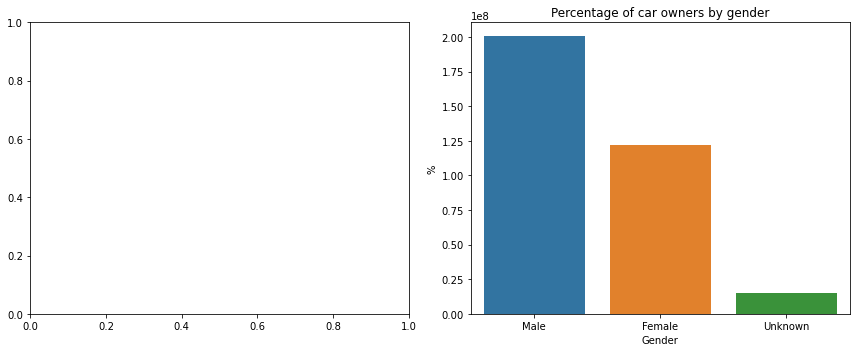

In [36]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
ax[0] = sns.barplot(x = 'Gender', y ='Count', data = data_gender)
ax[0].set_title('Number of car owners by gender')
ax[1] = sns.barplot(x = 'Gender', y ='%', data = data_gender)
ax[1].set_title('Percentage of car owners by gender')
fig.tight_layout()

The majority of car owners are male, close to 60%, and only a small fraction, about 5%, is of unknown gender.

### Top Manufacturer by Number of Owners

In [21]:
top_manufacturer = data.groupby('Manufacturer', as_index=False)['Male', 'Female', 'Total'].sum()
top_manufacturer.head()

,Manufacturer,Male,Female,Total
0,Abarth,7124,4719,12413
1,Alfa-Romeo,764932,233389,1049063
2,Aston-Martin,76029,6444,85733
3,Audi,6150874,2191786,8792989
4,BMW,10556504,3334594,14612429


Text(0.5, 1.0, 'Top 15 Manufacturer by Number of Owners')

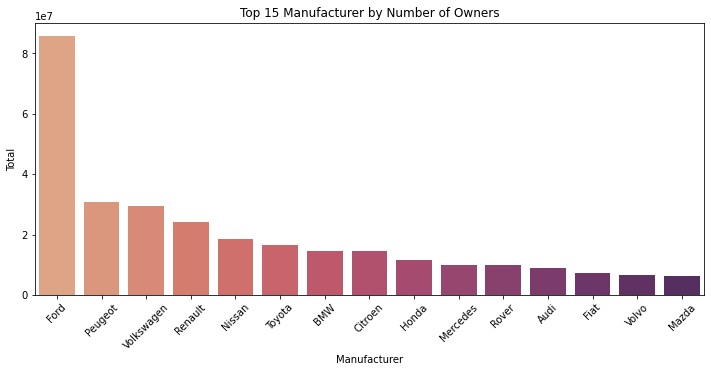

In [34]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x = 'Manufacturer', y ='Total', data = top_manufacturer.sort_values('Total', ascending=False).head(15), palette='flare', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Top 15 Manufacturer by Number of Owners')

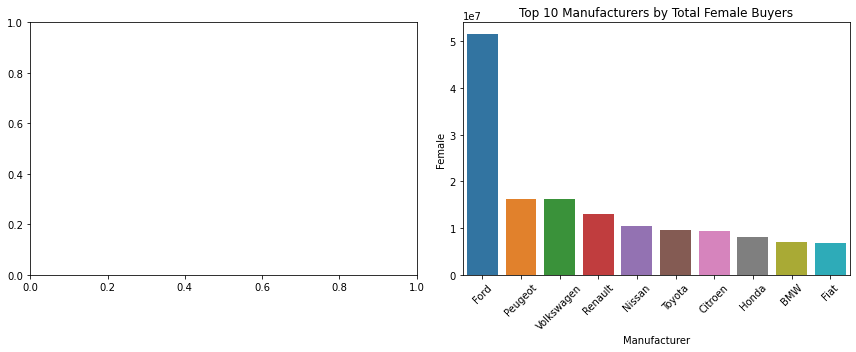

In [39]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
ax[0] = sns.barplot(x = 'Manufacturer', y ='Male', data = top_manufacturer.sort_values('Male', ascending=False).head(10))
ax[0].set_title('Top 10 Manufacturers by Total Men Buyers')
ax[0].tick_params(axis='x', labelrotation=45)
ax[1] = sns.barplot(x = 'Manufacturer', y ='Female', data = top_manufacturer.sort_values('Female', ascending=False).head(10))
ax[1].set_title('Top 10 Manufacturers by Total Female Buyers')
ax[1].tick_params(axis='x', labelrotation=45)
fig.tight_layout()

As we can see from the different graphs Ford is the most sold car, and there is no significant different in choices between genders. The top manufacturers are: Ford, Pegeot, Volkswagen, and Renault.

### Top Models by Number of Owners

Similarly as before, we take a look at what models are preferred by the customers.

In [42]:
top_model = data.groupby(['Model', 'Manufacturer'], as_index=False)['Male', 'Female', 'Total'].sum()
top_model.head()

,Model,Manufacturer,Male,Female,Total
0,09-May,Saab,374012,70387,471084
1,100,Audi,290434,55293,359404
2,1007,Peugeot,23987,24239,50864
3,104,Peugeot,5736,4970,10999
4,105,Skoda,13619,7141,21131


Text(0.5, 1.0, 'Top 15 Models by Number of Owners')

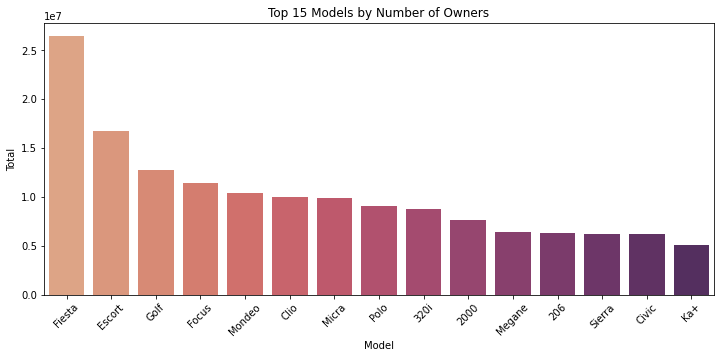

In [43]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x = 'Model', y ='Total', data = top_model.sort_values('Total', ascending=False).head(15), palette='flare', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Top 15 Models by Number of Owners')

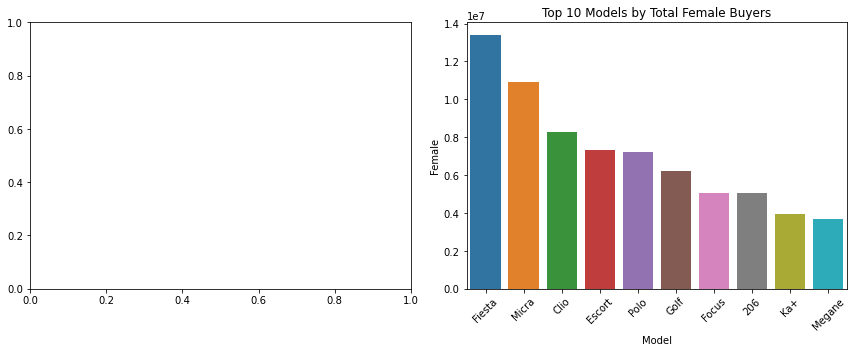

In [44]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
ax[0] = sns.barplot(x = 'Model', y ='Male', data = top_model.sort_values('Male', ascending=False).head(10))
ax[0].set_title('Top 10 Models by Total Men Buyers')
ax[0].tick_params(axis='x', labelrotation=45)
ax[1] = sns.barplot(x = 'Model', y ='Female', data = top_model.sort_values('Female', ascending=False).head(10))
ax[1].set_title('Top 10 Models by Total Female Buyers')
ax[1].tick_params(axis='x', labelrotation=45)
fig.tight_layout()

- Fiesta outnumbered every other model both for male and female
- After Fiesta the choices between male and female tend to change a lot with genders choosing different type of cars

### Insights on Fuel Types

In [45]:
fuel_data= data.groupby('Fuel', as_index=False)['Model'].count()

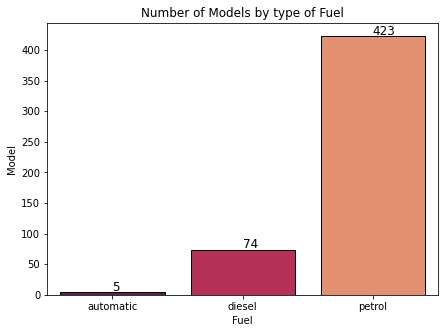

In [46]:
fig, ax= plt.subplots(figsize=(7,5))
sns.barplot(x='Fuel', y='Model', data=fuel_data, palette='rocket', edgecolor='black', ax=ax)
ax.set_title('Number of Models by type of Fuel', fontsize=12)
for i,v in enumerate(fuel_data['Model'].tolist()):
    ax.text(x=i, y=v+2, s=f"{v}" , fontdict=dict(fontsize=12))

- We can see that petrol account for most of the cars bought ~85%
- The low number of automatic fuel and diesel might be due to higher prices, let's check!

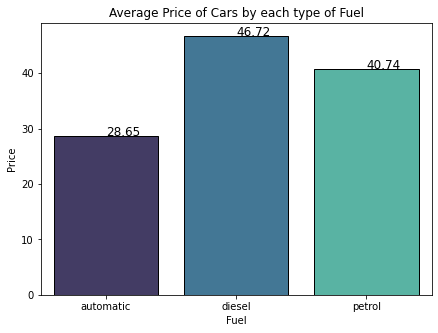

In [47]:
fig, ax= plt.subplots(figsize=(7,5))
df= data.groupby('Fuel',as_index=False)['Price'].mean()
sns.barplot(x='Fuel', y='Price', data= df
            , palette='mako', edgecolor='black', ax=ax)
ax.set_title('Average Price of Cars by each type of Fuel', fontsize=12)
for i,v in enumerate(df['Price'].tolist()):
    ax.text(x=i, y=v, s=f"{np.round(v,2)}" , fontdict=dict(fontsize=12))

- Surprisingly there is no significant difference in price across fuels, which means that the price of fuel is not a significant variant in the choice of the model.

### Histogram, Correlation Matrix Plot, and Pair Plot for Numeric Variables

Exploring relationship between Transmission, Power, and Engine CC and the predictor Price in order to apply regression model

In [52]:
predictor= ['Transmission', 'Power', 'Engine CC']
target= 'Price'

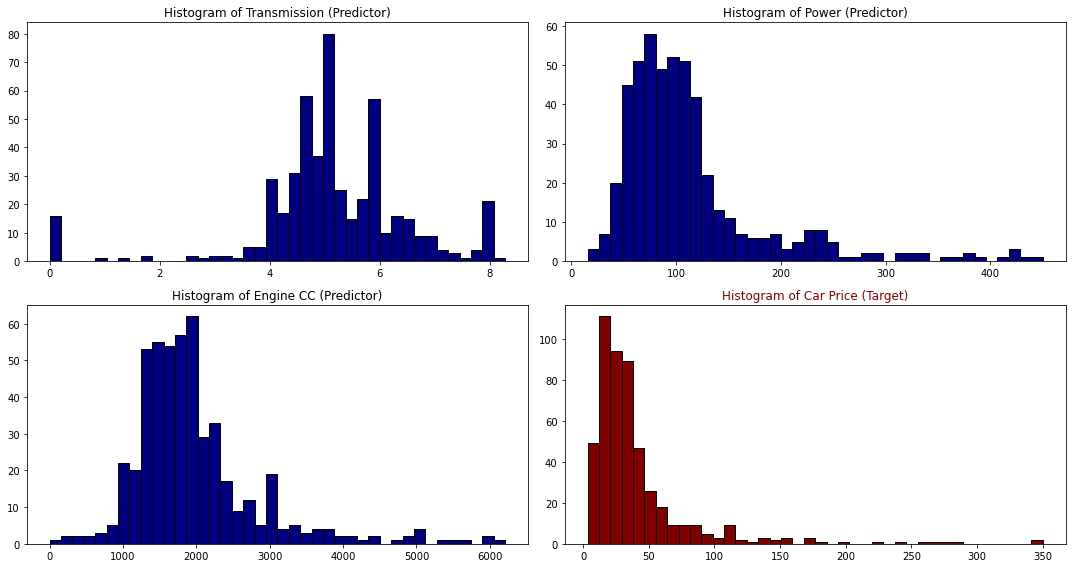

In [53]:
fig, ax= plt.subplots(nrows= 2, ncols=2, figsize=(15,8))
ax_index=[ax[0,0],ax[0,1],ax[1,0]]
ax[1,1].hist(data[target].clip(upper=350),bins=40,color='maroon', edgecolor='black')
ax[1,1].set_title('Histogram of Car Price (Target)', color='darkred')
for i in range(3):
    ax_index[i].hist(data[predictor[i]],bins=40,color='navy', edgecolor='black')
    ax_index[i].set_title(f'Histogram of {predictor[i]} (Predictor)')
fig.tight_layout();

- The histograms don't show any peculiarity
- Only Price is very skewed to the right which might mean that we have outliers that might influence our final result

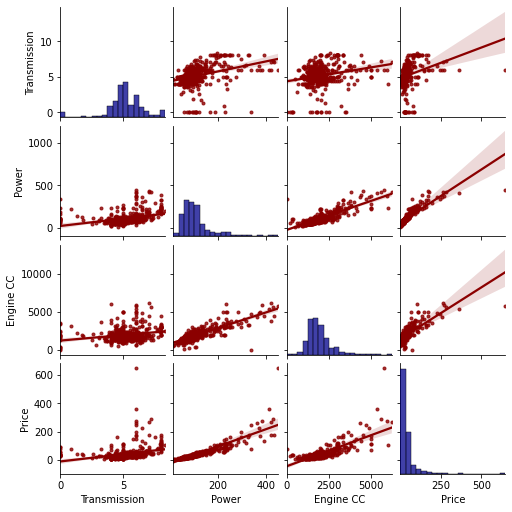

In [50]:
sns.pairplot(data=data[predictor+[target]], kind='reg', diag_kws={'bins':20, 'color':'darkblue','edgecolor':'black'},
            plot_kws={'marker':'.','color':'darkred'}, size=1.8);

- When looking at the scatter plot of the variables against price we can notice a strong relationship
- The scatter plot highlights the fact that a few points are very skewed for price, so we need to handle it in our regression model
- To try and reduce issues with these point I'm going to use capping: we replace any value that is above the 98% with the value of the 98% percentile.

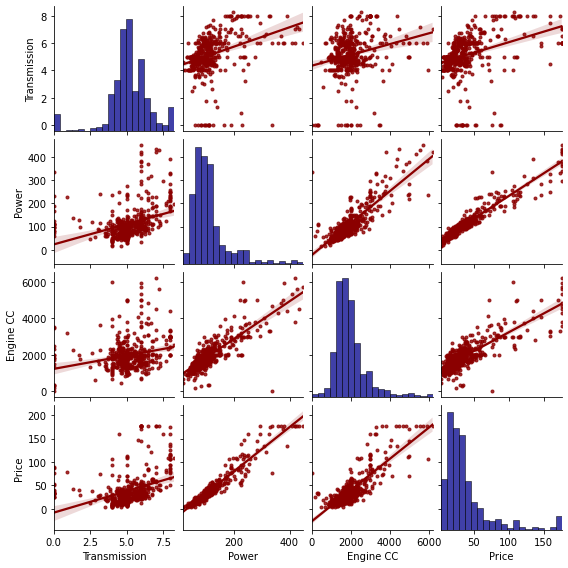

In [57]:
data2 = data.copy()
data2['Price'] = data2['Price'].clip(upper=data['Price'].quantile(0.98))
sns.pairplot(data=data2[predictor+[target]], kind='reg', diag_kws={'bins':20, 'color':'darkblue','edgecolor':'black'},
            plot_kws={'marker':'.','color':'darkred'}, size=2);

Now the scatter plots look much better 

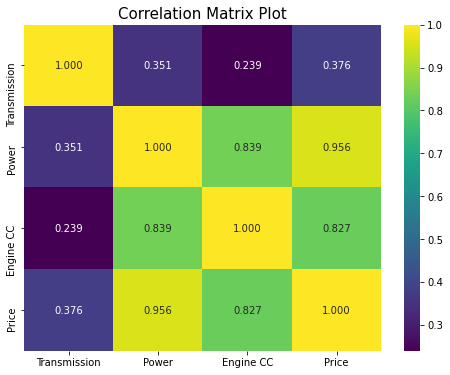

In [58]:
# Correlation Matrix plot 
fig, ax= plt.subplots(figsize=(8,6))
sns.heatmap(data2[predictor+[target]].corr(), annot=True, cmap='viridis',
            fmt='0.3f',ax=ax)
ax.set_title('Correlation Matrix Plot', fontsize=15);

- Price seems to be highly correlated with Power and Engine CC
- We can also notice a high correlation between power and engine CC, to check whether this can pose a multicollinearity issue we use VIF metric to check our assumptions

In [62]:
X=data2[predictor]
vif_info= pd.DataFrame()
vif_info['Column']= X.columns
vif_info['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info

,Column,VIF
0,Transmission,5.650988
1,Power,11.321799
2,Engine CC,16.026928


- VIF for both Power and Engine CC is above 10, so we drop the highest VIF column (Engine CC) even though it is not usually recommended

In [63]:
# Recalculate VIF metric 
X=data2[['Transmission','Power']]
vif_info= pd.DataFrame()
vif_info['Column']= X.columns
vif_info['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info

,Column,VIF
0,Transmission,3.99193
1,Power,3.99193


Now VIF looks good being lower than 5, making us certain that there won't be any multicollinearity issues

### Training Models

#### Linear Regression

In [64]:
X= data2['Power'].values
y= data2['Price'].values
X= X.reshape(-1,1)
y=y.reshape(-1,1)

##### Train Test Split

In [66]:
# Split the data into train (80%) and test (20%) set 
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [69]:
# Training linear regression on training set
regressor= LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [70]:
# Model coefficients 
display(regressor.coef_, regressor.intercept_)

array([[0.47134641]])

array([-13.74093313])

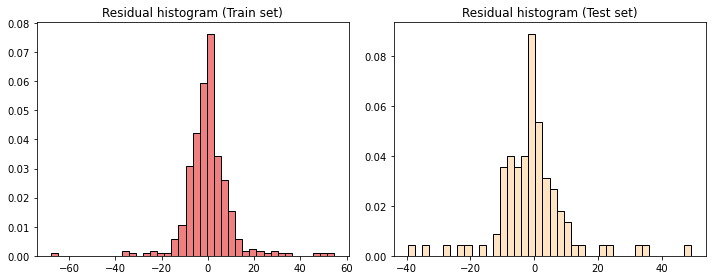

In [71]:
# Model performance
# Prediction on the train and test set 
train_diff= y_train- regressor.predict(X_train)
test_diff = y_test - regressor.predict(X_test)
fig,ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].hist(train_diff, bins=40, color='lightcoral', edgecolor='black', density =True)
ax[1].hist(test_diff, bins=40, color='bisque', edgecolor='black', density =True)
ax[0].set_title('Residual histogram (Train set)')
ax[1].set_title('Residual histogram (Test set)')
fig.tight_layout();

In [72]:
print('Mean of Residuals:',[np.mean(train_diff), np.mean(test_diff)])
print('Var of Residuals:',[np.var(train_diff), np.var(test_diff)])

Mean of Residuals: [-4.784202958983218e-16, -0.7924592436011768]
Var of Residuals: [94.97409146889501, 134.9524996958596]


In [73]:
# R2 measure
from sklearn.metrics import r2_score
display(r2_score(y_train,regressor.predict(X_train)),r2_score(y_test,regressor.predict(X_test)))

0.9241667165061157

0.8691049618800852

The model seem to work reasonably well, even though there is a little difference between training and test

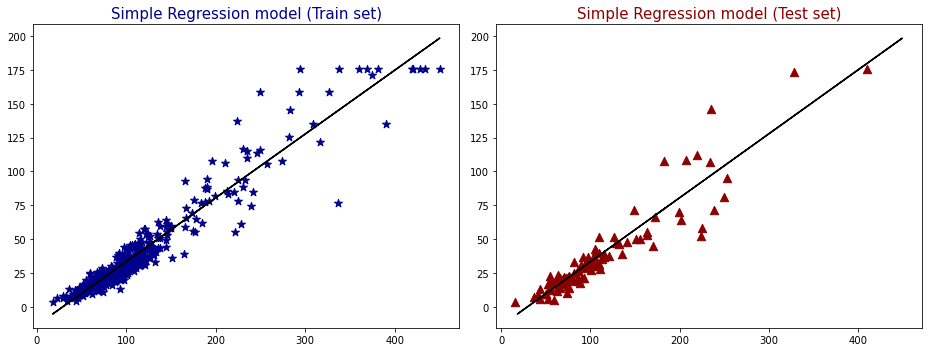

In [74]:
# Model visuallization
fig,ax= plt.subplots(ncols=2, figsize=(13,5))
# Train set
ax[0].scatter(X_train, y_train, color = 'darkblue', marker='*', s=70)
ax[0].plot(X_train, regressor.predict(X_train), color = 'black')
ax[0].set_title('Simple Regression model (Train set)', color='darkblue', fontsize=15)
# Test set
ax[1].scatter(X_test, y_test, color = 'darkred', marker='^', s=70)
ax[1].plot(X_train, regressor.predict(X_train), color = 'black')
ax[1].set_title('Simple Regression model (Test set)', color='darkred', fontsize=15)
fig.tight_layout()

#### Multiple Linear Regression

In [75]:
X= data2[['Transmission', 'Power']].values
y= data2['Price'].values
display(X[:3], y[:3])

array([[ 5.        , 60.625     ],
       [ 5.        , 87.71428571],
       [ 5.        , 87.71428571]])

array([21.105625  , 17.42714286, 18.19842857])

In [76]:
# Training and test split
# Split the data into train (80%) and test (20%) set 
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [77]:
# Training the model
regressor= LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [78]:
# Model coefficients 
display(regressor.coef_, regressor.intercept_)

array([1.55435936, 0.46098821])

-20.53939333597156

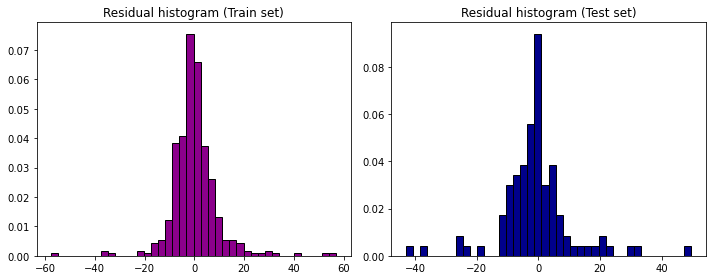

In [80]:
# Model performance
# Prediction on the train and test set 
train_diff= y_train- regressor.predict(X_train)
test_diff = y_test - regressor.predict(X_test)
fig,ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].hist(train_diff, bins=40, color='darkmagenta', edgecolor='black', density =True)
ax[1].hist(test_diff, bins=40, color='darkblue', edgecolor='black', density =True)
ax[0].set_title('Residual histogram (Train set)')
ax[1].set_title('Residual histogram (Test set)')
fig.tight_layout();

In [81]:
print('Mean of Residuals:',[np.mean(train_diff), np.mean(test_diff)])
print('Var of Residuals:',[np.var(train_diff), np.var(test_diff)])

Mean of Residuals: [-7.477532032188585e-15, -0.803149705447841]
Var of Residuals: [90.53239275833752, 142.87308240548577]


In [82]:
# R2 measure
display(r2_score(y_train,regressor.predict(X_train)),r2_score(y_test,regressor.predict(X_test)))

0.9277132479053916

0.8614416340199438

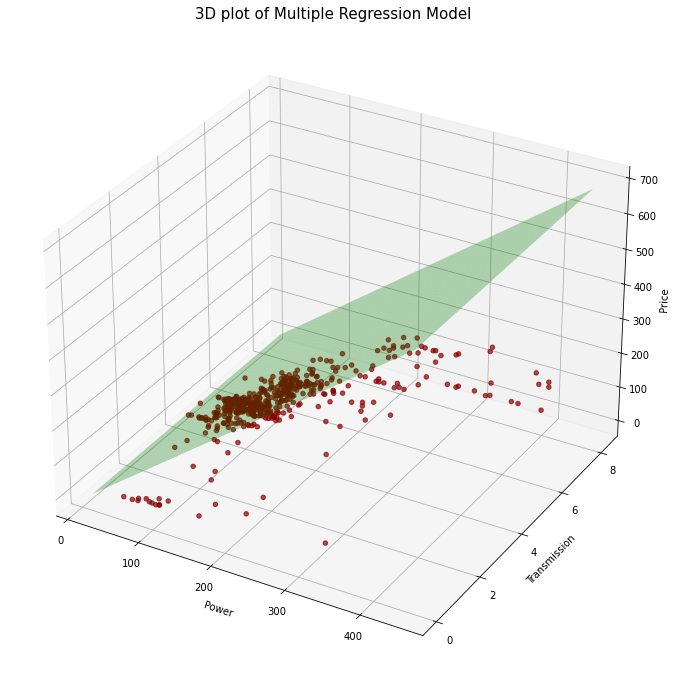

In [83]:
# Model visualization
x_surf, y_surf = np.meshgrid(np.linspace(data2['Power'].min(),data2['Power'].max(), 100),
                             np.linspace(data2['Transmission'].min(),data2['Transmission'].max(), 100))
X = pd.DataFrame({'Power': x_surf.ravel(), 'Transmission': y_surf.ravel()})
Y=regressor.predict(X)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(22,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Power'],data2['Transmission'],data2['Price'],c='darkred', marker='o', alpha=0.7)
ax.plot_surface(x_surf,y_surf,Y.reshape(x_surf.shape), color='green', alpha=0.3)
ax.set_xlabel('Power')
ax.set_ylabel('Transmission')
ax.set_zlabel('Price')
ax.set_title('3D plot of Multiple Regression Model', fontsize=15);


#### Support Vector Machine

In [84]:
X= data2['Power'].values
y= data2['Price'].values
X= X.reshape(-1,1)
y=y.reshape(-1,1)
display(X[:3], y[:3])

array([[60.625     ],
       [87.71428571],
       [87.71428571]])

array([[21.105625  ],
       [17.42714286],
       [18.19842857]])

In [85]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [86]:
# Split the data into train (80%) and test (20%) set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [87]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [88]:
# Parameters
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

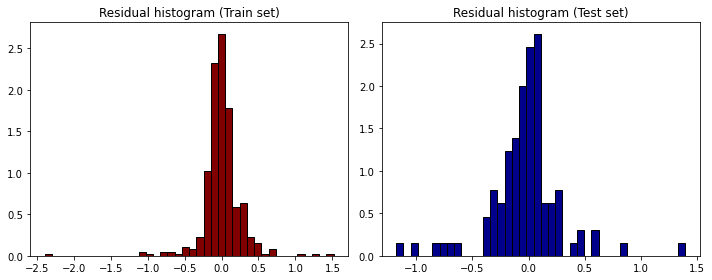

In [89]:
# Prediction on the train and test set 
train_diff= y_train- regressor.predict(X_train).reshape(-1,1)
test_diff = y_test - regressor.predict(X_test).reshape(-1,1)
fig,ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].hist(train_diff, bins=40, color='maroon', edgecolor='black', density =True)
ax[1].hist(test_diff, bins=40, color='darkblue', edgecolor='black', density =True)
ax[0].set_title('Residual histogram (Train set)')
ax[1].set_title('Residual histogram (Test set)')
fig.tight_layout();

In [90]:
print('Mean of Residuals:',[np.mean(train_diff), np.mean(test_diff)])
print('Var of Residuals:',[np.var(train_diff), np.var(test_diff)])

Mean of Residuals: [0.0006562485687167598, -0.027365695200212214]
Var of Residuals: [0.07316081231570944, 0.10704066033896381]


In [91]:
# R2 measure
from sklearn.metrics import r2_score
display(r2_score(y_train,regressor.predict(X_train).reshape(-1,1)),
        r2_score(y_test,regressor.predict(X_test).reshape(-1,1)))

0.9293561539250906

0.8741534968049799

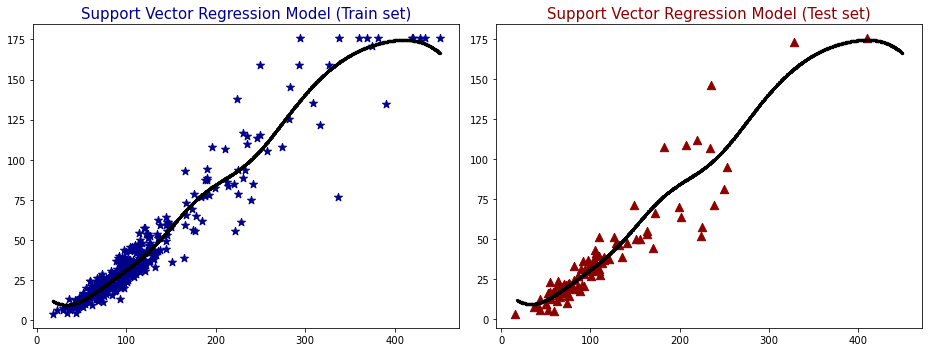

In [92]:
min_X, max_X= np.min(X_train),np.max(X_train)
X_grid= np.linspace(min_X, max_X, 1000).reshape(-1,1)
fig,ax= plt.subplots(ncols=2, figsize=(13,5))
# Train set
ax[0].scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'darkblue', marker='*', s=70)
ax[0].scatter(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'black',s=5)
ax[0].set_title('Support Vector Regression Model (Train set)', color='darkblue', fontsize=15)
# Test set
ax[1].scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = 'darkred', marker='^', s=70)
ax[1].scatter(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'black',s=5)
ax[1].set_title('Support Vector Regression Model (Test set)', color='darkred', fontsize=15)
fig.tight_layout()

#### Random Forest Regression

In [93]:
X= data2['Power'].values
y= data2['Price'].values
X= X.reshape(-1,1)
y=y.reshape(-1,1)
display(X[:3], y[:3])

array([[60.625     ],
       [87.71428571],
       [87.71428571]])

array([[21.105625  ],
       [17.42714286],
       [18.19842857]])

In [94]:
# Split the data into train (80%) and test (20%) set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [95]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [96]:
# Parameters
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

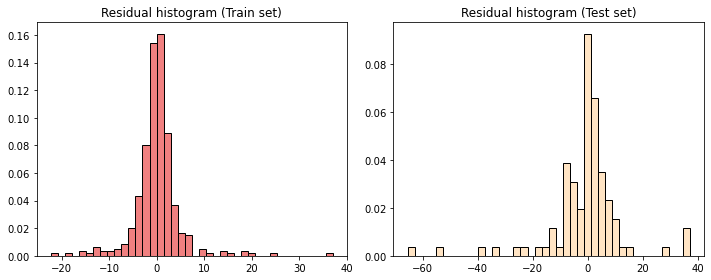

In [97]:
# Prediction on the train and test set 
train_diff= y_train- regressor.predict(X_train).reshape(-1,1)
test_diff = y_test - regressor.predict(X_test).reshape(-1,1)
fig,ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].hist(train_diff, bins=40, color='lightcoral', edgecolor='black', density =True)
ax[1].hist(test_diff, bins=40, color='bisque', edgecolor='black', density =True)
ax[0].set_title('Residual histogram (Train set)')
ax[1].set_title('Residual histogram (Test set)')
fig.tight_layout();

In [98]:
print('Mean of Residuals:',[np.mean(train_diff), np.mean(test_diff)])
print('Var of Residuals:',[np.var(train_diff), np.var(test_diff)])

Mean of Residuals: [-0.02858565040229936, -1.269088490126411]
Var of Residuals: [23.078125958152516, 186.44636903515098]


In [99]:
from sklearn.metrics import r2_score
display(r2_score(y_train,regressor.predict(X_train)),r2_score(y_test,regressor.predict(X_test)))

0.9815723213816707

0.8184420044486094

The model clearly overfits the data

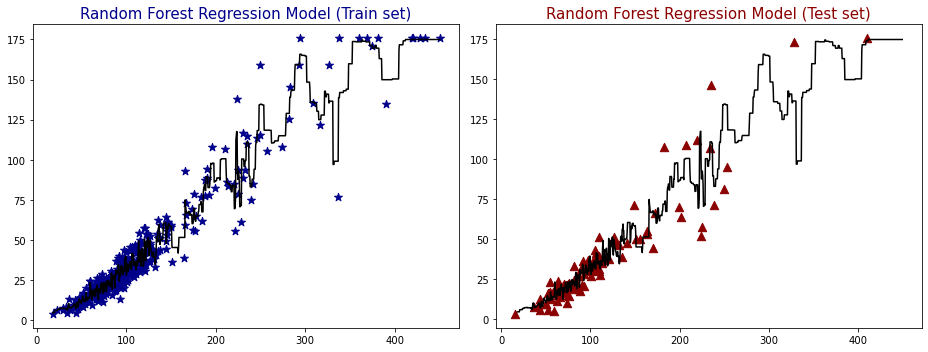

In [100]:
min_X, max_X= np.min(X_train),np.max(X_train)
X_grid= np.linspace(min_X, max_X, 1000).reshape(-1,1)
fig,ax= plt.subplots(ncols=2, figsize=(13,5))
# Train set
ax[0].scatter(X_train, y_train, color = 'darkblue', marker='*', s=70)
ax[0].plot(X_grid, regressor.predict(X_grid), color = 'black')
ax[0].set_title('Random Forest Regression Model (Train set)', color='darkblue', fontsize=15)
# Test set
ax[1].scatter(X_test,y_test, color = 'darkred', marker='^', s=70)
ax[1].plot(X_grid, regressor.predict(X_grid), color = 'black')
ax[1].set_title('Random Forest Regression Model (Test set)', color='darkred', fontsize=15)
fig.tight_layout()

In [101]:
# Might want to add regularization techniques to reduce overfitting.